C:\Users\avina\AppData\Local\Temp\ipykernel_17448\2998323778.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\avina\AppData\Local\Temp\ipykernel_17448\2998323778.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

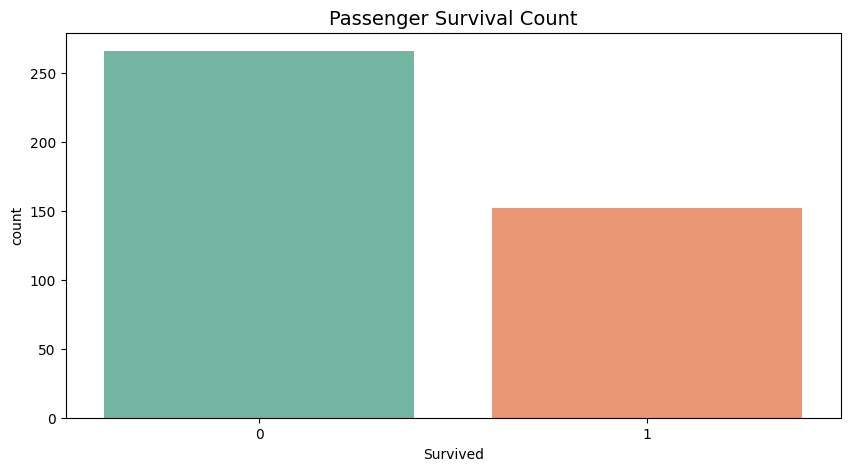

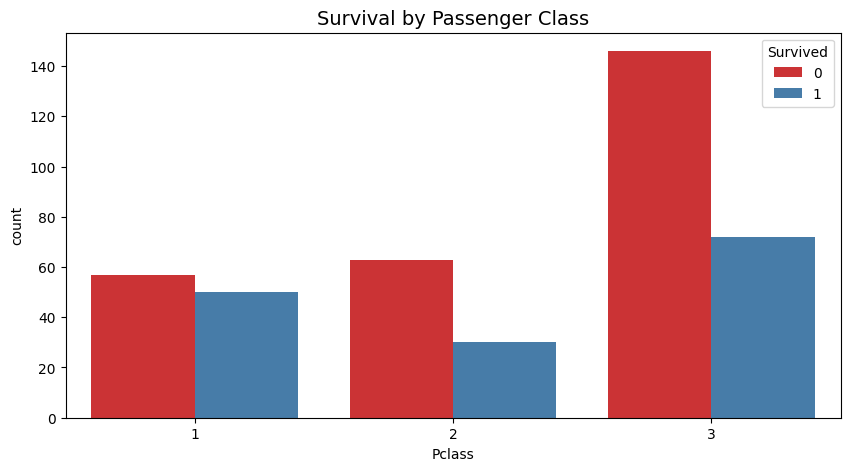

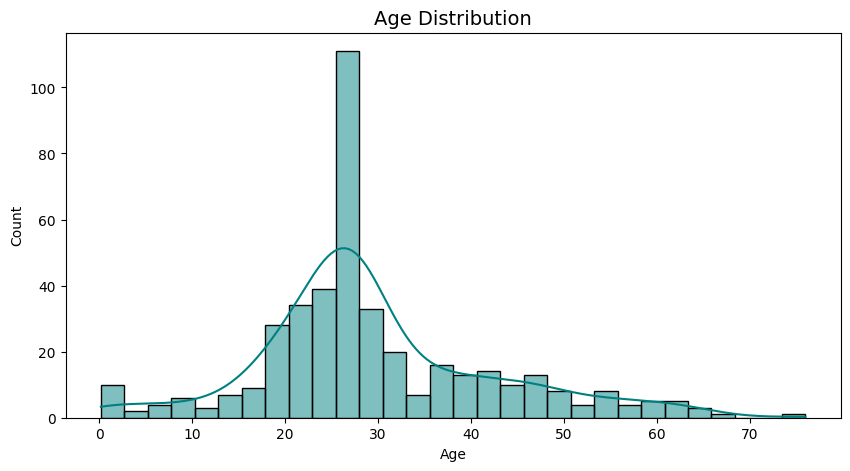

C:\Users\avina\AppData\Local\Temp\ipykernel_17448\2998323778.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')


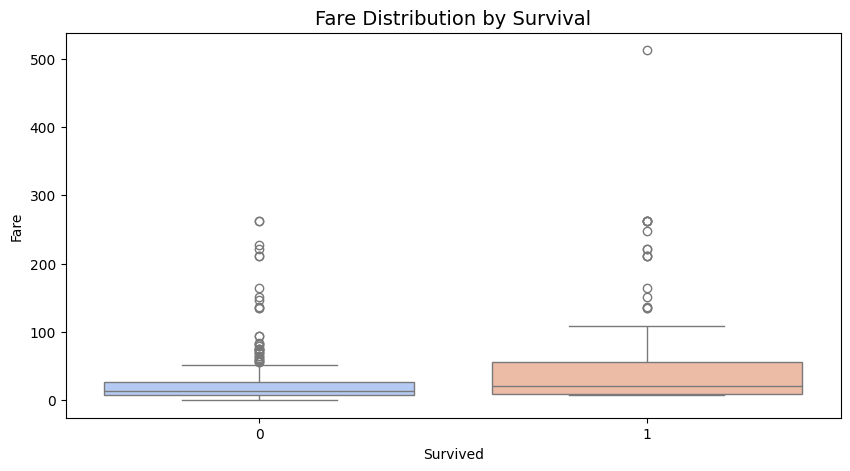

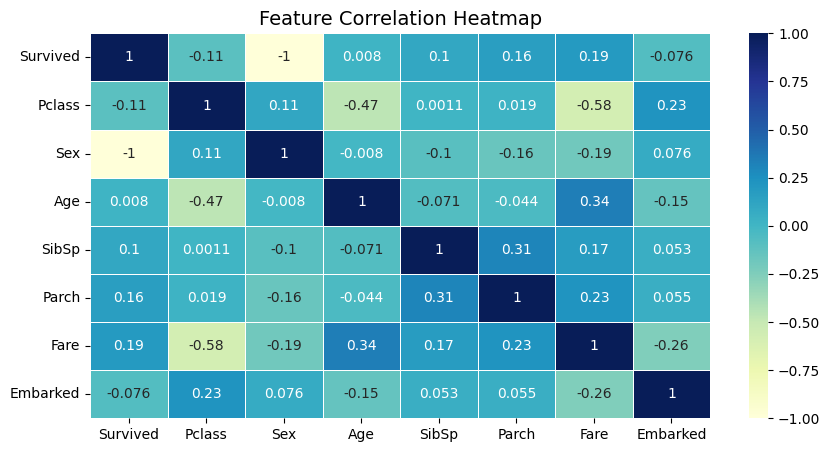

Model Evaluation Metrics


,Metric,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1 Score,1.0
4,ROC AUC,1.0


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



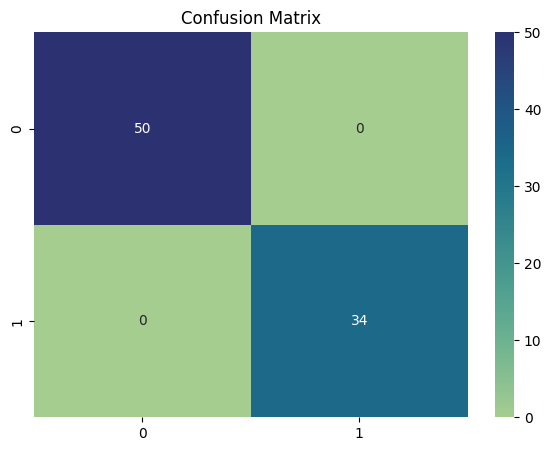

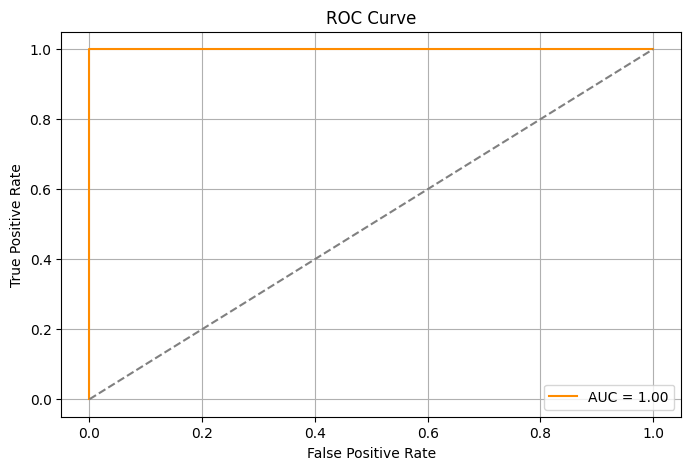

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import pickle

df = pd.read_csv(r"C:\Users\avina\Downloads\archive (2)\tested.csv")

df.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', palette='Set2', data=df)
plt.title("Passenger Survival Count", fontsize=14)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=df)
plt.title("Survival by Passenger Class", fontsize=14)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='teal')
plt.title("Age Distribution", fontsize=14)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')
plt.title("Fare Distribution by Survival", fontsize=14)
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

X = df.drop('Survived', axis=1)
y = df['Survived']
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

with open("titanic_model.pkl", "wb") as f:
    pickle.dump(model, f)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [acc, prec, rec, f1, roc]
})
print("Model Evaluation Metrics")
display(metrics_df)

print("Classification Report")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
